# Estructuras

Una estructura de datos es una forma en la cual acomodar datos de tal manera que podamos acceder a ellas. La más común de estas estructuras es la lista. Julia tiene ya predefinidas (como ya vimos) las listas. Vale la pena detenernos a revisar algunas de sus operaciones típicas. 

Por ejemplo, si tenemos una lista de números, la operación $maximum(a)$ nos arrojará el valor máximo de la lista. 

In [ ]:
using LinearAlgebra
a = rand(100)
maximum(a)

De forma similar existe $minimum$

In [ ]:
minimum(a)

Otra operación importante es la de encontrar un elemento en particular. Para eso usamos la función $findall$, que es un poquito complicada. Esta función requiere de 2 argumentos, el primero es una función, el segundo es una lista (o matriz). $findall(f,a)$ regresa todos los índices (o llaves) de la lista $a$ donde $f(a_i)$ regresa $true$. En caso de que no haya ningún valor donde esto suceda, entonces regresa un arreglo vacío. 

La pregunta aquí es ¿cómo buscar entonces en una lista $a$ todos los elementos que sean iguales a $b$?

Para esto usamos la función in(b). 


In [ ]:
a = [1,2,3,4,5,5]
in(5)(5), in(5)(4)

In [ ]:
findall(in(5),a)

Otra operación de sumo interés cuando se trabaja con bases de datos es ordenar las listas. Si se tiene una lista ordenada es extremadamente fácil encontrar el máximo o el mínimo (aunque claro, ordenar no es siempre eficiente).

Para ordenar una lista existe la función $sort$. 

In [ ]:
a = rand(10)
sort(a)

si se quiere ordenar en el sentido contrario, se puede usar $rev = true$ como un argumento: 

In [ ]:
sort(a, rev = true)

Otra posibilidad es que quieran ordenar utilizando pares ordenados (o tercias, etc..). En este caso, quizá quieran ordenar los datos utilizando el segundo elemento (en vez del primero que tiene por default). Por ejemplo ordenar la lista [[2,5],[5,1],[1,2],[3,4]]. Para esto podemos utilizar el argumento $by$. $by$ nos permite indicar una función que se aplicará a nuestra lista antes de ordenar los datos. En caso de querer ordenar utilizando el primer elemento, la función puede ser $f(x) = x[2]$, que significa que se tomará el primer elemento de cada par.  

Otra forma de poner esta función como argumento es utilizando lo que se conoce como funciones anónimas. Una función anónima es una que no se nombra, pero se utiliza. La función que propusimos arriba se puede escribir de forma anónima como $x \rightarrow x[2]$. 



In [ ]:
x -> x[2] 

In [ ]:
a = []
for i in 1:10
    push!(a,rand(2))
end

In [ ]:
sort(a, by = x -> x[2])

De la misma forma, podríamos usar $by$ para ordenar con respecto a los valores más cercanos a un punto:

In [ ]:
sort(a, by = x -> norm(x))

Si utilizan $sort$ sin el argumento by sobre una lista de pares ordenados, los ordenará de menor a mayor utilizando el primer elemento y si hay dos con el mismo primer elemento, entonces verá el segundo elemento del par para decidir cuál va primero, también poniéndolo de menor a mayor. 

### Arboles binarios

Un árbol es una estructura de datos formada por "nodos" e "hijos" (hojas). Existe un nodo *raiz*, que es el equivalente al primer elemento de una lista. El nodo raiz no tiene "padre", sólo hijos. En el caso de los árboles binarios cada nodo puede tener hasta 2 hijos, normalmente llamados "izquierda" y "derecha". 

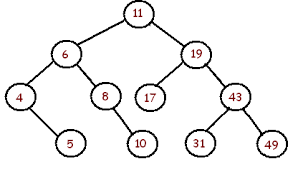


En general existe una regla, predefinida para formar el árbol, esta puede ser por ejemplo, si el nuevo elemento es mayor que el nodo, entonces se pondrá a la izquierda, sino a la derecha. 

La ventaja de los árboles binarios es que suelen ser mucho más rápidos para buscar elementos que hacerlo sobre listas. La función $findall$ para las listas, por ejemplo, utiliza por default un algoritmo que tiene una complejidad en promedio de $n$. 

En cambio en un árbol buscar un elemento lleva sólo $log(n)$ en promedio (o estrictamente, la altura del árbol), aunque en el peor de los casos tiene la misma complejidad, pues el árbol se vuelve una lista. Para evitar este "peor caso" uno puede utilizar lo que se conoce como árboles bien balanceados (que por ahora no veremos). Los árboles bien balanceados significa acomodar los datos de tal forma que a lo más 1 nodo tenga sólo un hijo. 


Para hacer una estructura de datos tipo árbol binario podemos también usar listas. Una forma es acomodarlos tal cual una lista y luego poner una regla para buscar (saltando datos). Esto sólo funciona si el árbol está balanceado. En realidad lo más sencillo es crear una lista de listas. Se comienza, como en el caso de las estructuras de listas, con un arreglo vacío $arbol =[]$. Después se agrega el elemento raiz y dos listas vacías dentro: $arbol = [raiz, [],[]]$ esas listas corresponde a los hijos izquierdo y derecho. Seguido a esto uno puede agregar en arbol[2] o arbol[3] un elemento según se cumpla la regla para el lado izquierdo o para el derecho. Por ejemplo, podemos hacer la función push! para un árbol de la siguiente manera: 

In [ ]:
# omití la funcion push2!(Arbol) porque es uno de los problemas de la tarea. 

In [ ]:
Arbol = []
push2!(Arbol, rand())
Arbol

In [ ]:
for i in 1:99
    push2!(Arbol, rand())
end

Para buscar el mínimo o el máximo, basta con hacer recorrer el árbol sólo por la izquierda o sólo por la derecha. En la tarea ustedes harán sus propias funciones para encontrar mínimos, máximos, encontrar algún elemento en particular y generalizarán las reglas para agregar elementos. En un futuro quizá veremos un algoritmo para valancear el árbol, aunque en muchos casos no vale la pena balancearlo. 

# Gráficas

Por ahora utilizaremos la paquetería de Plots. Si no la tienen instalada, instálenla. 

using Pkg 

Pkg.add("Plots")

Pkg.add("Plotly")

Pkg.add("PyPlot")

Pkg.add("GR")

Recuerden, la primera vez que pongan una gráfica en cada notebook se tardará un poco más, pues tiene que compilar. Después será más rápido. 

El siguiente paso es indicar que usarán la paquetería correspondiente: 

using Plots

Depende de como instalan Plots (en qué momento lo hicieron y si su compu tiene conflictos con alguna paquetería), pero en general usa por default la paquetería de GR. Si quieren cambiar de paquete, simplemente pongan el nombre de la paquetería seguido de un paréntesis, todo en minúsculas. Por ejemplo, si quieren usar PyPlot, escriban: 

pyplot()

In [ ]:
using Plots
pyplot()

Yo en lo personal prefiero gr() en general, aunque para algunas cosas me gusta más plotly() y en algunos casos sí prefiero pyplot(). 

Para hacer una gráfica donde unen puntos en el plano (o espacio), se usa la función $plot(X,Y)$, donde $X$ y $Y$ son listas de números enteros o flotantes (no acepta números BigFloat o BigInt), o bien, puede aceptar cadenas, por ejemplo $X = ["hola", "Adios"]$. 

In [ ]:
X = ["hola", "Adios"]
Y = rand(2)
plot(X,Y)

Frecuentemente vamos a querer quitar la etiqueta, para eso agregamos el argumento $key =false$. 

In [ ]:
X = rand(100)
Y = rand(100)
plot(X,Y, key = false)

Otra posibilidad es que quieran nombrar de alguna forma la etiqueta, para eso utilizan el argumento $label$

In [ ]:
X = rand(100)
Y = rand(100)
plot(X,Y, label = "hola")

Otros atributos comunes a usarse son: $aspect_ratio = :equal, valor$, $xlabel = string$, $xlims = tupla$, $xticks = range$, $xscale = :log10, :log2, :identity, :ln$, $linewidth = valor$, $linecolor = :red, :blue, :yellow, :black,..., rgb(valor,valor,valor) $, $linealpha = valor$. 

aspect_ratio nos da una razón visual de la gráfica entre el eje $x$ y el $y$. $linealpha$ nos dice qué tan transparente serán las lineas. Los demás creo que son más o menos intuitivos lo que significa. 

In [ ]:
X = rand(100)
Y = rand(100)
plot(X,Y, label = "red", linecolor = :red, xlims = (-1,2), aspect_ratio = :equal, linealpha = 0.3, linewidth = 5)

Existe además la posibilidad de que quieran encimar gráficas, para eso se utiliza la función $plot!$

In [ ]:
plot!(rand(100), rand(100), linecolor = :green, linealpha = 0.3, label = "green")

Si intentan hacer gráficas dentro de un ciclo, no les aparecerá nada. Por ejemplo: 

In [ ]:
for i in 1:100
    plot(rand(10),rand(10), key = false)
end

Para que aparesca algo, necesitan usar el argumento $show = :ijulia$

In [ ]:
X = 0:0.01:2π
for i in 1:100
    plot(X,sin.(X.+0.1*i), key = false, show = :ijulia)
end

Otra forma de hacer animaciones, es produciendo un gif animado. Para esto podemos usar el macro @gif antes del ciclo. Esto generará un archivo "tmp.gif" que tendrá la animación. Por ejemplo: 

In [ ]:
X = 0:0.01:2π
@gif for i in 1:100
    plot(X,sin.(X.+0.1*i), key = false, show = false)
end

Otra forma de hacer lo mismo, pero generando un archivo con un determinado nombre es utilizar el macro @animate. Este macro permite generar sólo las imágenes necesarias en un archivo. Después se puede con estas imágenes generar el gif animado con el nombre que se quiera y los fps que se desée. 

In [ ]:
X = 0:0.01:2π
animacion = @animate for i in 1:100
    plot(X,sin.(X.+0.1*i), key = false, show = :ijulia)
end

In [ ]:
gif(animacion, "sin.gif", fps = 15)

También es posible que quieran hacer gráficas donde rellenen lo que hay "bajo la curba". Para esto se usa el argumento $fill$

In [ ]:
X = 0:0.01:2π
for i in 1:100
    plot(X,sin.(X.+0.1*i), key = false, show = :ijulia, fill = true, linecolor= :red, color = :green, linewidth = 5, alpha = 0.3)
end

Si en cambio, lo que quieren es rellenar lo que "encierre" una curva (lo cual usaremos más frecuentemente), pueden utilizar el argumento: $seriestype = :shape$


In [ ]:
X = [0,1,1,0,0]
Y = [0,0,1,1,0]
plot(X,Y, key = false, seriestype = :shape)

Además de $plot()$, utilizaremos mucho la función $scatter()$ que se comporta similar, pero en vez de utilizar $linealgo$ se utilizan los argumentos $markeralgo$. $markercolor$, $markeralpha$,..., y los nuevos $markersize$ y $markershape$. Para $markershape$ existen varias posibilidades, entre otras definir sus propias formas, utilizando la función $shape()$: 

In [ ]:
 verts = [(4.,0.)]
verts2 = [(2.5,2.)]
verts3 = [(-1.5,2.)]
verts4 = [(.5,.5)]
verts5 = [(.5,-1.0)]
for t in 0:0.3:2π+.3
    push!(verts,(4*cos(t),4*sin(t)))
end
for t in 0:0.9:2π+.3
    push!(verts2,(.5*cos(t)+2,.5*sin(t)+2))
    push!(verts3,(.5*cos(t)-2,.5*sin(t)+2))
    push!(verts4,(.5*cos(t),.5*sin(t)+.5))
    push!(verts5,(.5*cos(t),.5*sin(t)-1))
end
plot(verts)
plot!(verts2)
plot!(verts3)
plot!(verts4)
plot!(verts5, aspect_ratio = :equal, key = false)
cabeza = Shape(verts)
ojoi = Shape(verts2)
ojod = Shape(verts3)
nariz = Shape(verts4)
boca = Shape(verts5)

In [ ]:
pyplot()
si = randn(20)
x = 10*rand(20)
y = 10*rand(20)
z = rand(20)
scatter(x,y, markersize = 30*si, marker = cabeza, markercolor = :white,  markeralpha=0.2)
scatter!(x,y, markersize = 10*si, marker = (nariz,RGBA(1,.3,0,0.5)))
scatter!(x,y, markersize = 20*si, marker = (ojod,RGBA(0,.5,.5,0.5)))
scatter!(x,y, markersize = 20*si, marker = (ojoi,RGBA(0,.5,.5,0.5)))
scatter!(x,y, markersize = 20*si, marker = (boca,RGBA(1,0,0,0.5)), key = false)

In [ ]:
x = [1]
y = [0]
for i in 0:100
    x = [1]
    y = [0.1*i]
    scatter(x,y, markersize = 30, marker = cabeza, markercolor = :white,  markeralpha=0.2, show = false)
    scatter!(x,y, markersize = 10, marker = (nariz,RGBA(1,.3,0,0.5)))
    scatter!(x,y, markersize = 20, marker = (ojod,RGBA(0,.5,.5,0.5)))
    scatter!(x,y, markersize = 20, marker = (ojoi,RGBA(0,.5,.5,0.5)))
    scatter!(x,y, markersize = 20, marker = (boca,RGBA(1,0,0,0.5)), key = false, xlim = (0,2), ylim=(0,10), show = :ijulia)
end

Otras funciones de plots que pueden interesar son : 

$histogram(Lista, nbins=entero)$, $heatmap(X,Y, M)$, $histogram2D(Lista1,Lista2,nbins =entero)$, $contour(X,Y,M)$, $quiver(vectores, quiver= functio)$, $surface(Mx,My,Mz)$, etc..  

Por ahora no hablaremos de esas funciones. 

Para guardar una imágene de una gráfica, se usa la función savefig("nombre.extencion"), en general se pude guardar como gif, pdf, jpg, png, etc... 

# Ajustes a curvas

Para poder hacer ajustes a curvas y con ello obtener "leyes", "ecuaciones de estado" etc, necesitamos la paquetería LsqFit, que se instala simplemente usando Pkg.add("LsqFit"). Esta paquetería permite ajustar los parámetros de una funcion que nosotros propongamos a un conjunto de datos. Funciona básicamente por mínimos cuadrados. Además de ajustar la mejor curva, también nos da la varianza de nuestros puntos con respecto a la curva que propongamos. 

In [ ]:
using LsqFit
model(x, p) = p[1]*exp.(-x.*p[2])
xdata = 0:20
ydata = model(xdata, [1.0 2.0]) + 0.01*randn(length(xdata))
p0 = [0., 0.1]
fit = curve_fit(model, xdata, ydata, p0)  

# esto también es un problema de la tarea, por lo que será necesario poner otra función en la tarea. 
# No es válida la función exponencial

In [ ]:
P = fit.param
plot(xdata, model(xdata,P), label = "modelo")
scatter!(xdata,ydata,label = "datos")